<a href="https://colab.research.google.com/github/Doga0/GLOBALa-HUB-DEEPLEARN-NG-BOOTCAMP/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [15]:
labels = ["air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]
import os
# for i in range(10):
#   for files in os.listdir("/content/drive/MyDrive/spects2/{}".format(i)):
#     labels.append([files, y[i]])
    
# for i in range(len(labels)):
#     X = labels[i][0]

# y = 0,1,2,3,4,5,6,7,8,9 ve classlar
# x = tüm dataset(fotolar)
path = "/content/drive/MyDrive/spects2"
batch_size = 32
img_height = 256
img_width = 256

train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# X_train, X_temperory, y_train, y_temperory = train_test_split(X, y,  test_size=0.8)
# X_val, X_test, y_val, y_test = train_test_split(X_temperory,y_temperory,train_size=0.5)
# print(f"Lenght of the dataset: {len(X)}")
# print(f"Lenght of the training dataset: {len(X_train)}")
# print(f"Lenght of the validation dataset: {len(X_val)}")
# print(f"Lenght of the test dataset: {len(X_test)}")

Found 8732 files belonging to 10 classes.
Using 6986 files for training.


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_dataset = val_ds.take(15)
val_ds = val_ds.skip(15)

Found 8732 files belonging to 10 classes.
Using 1746 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


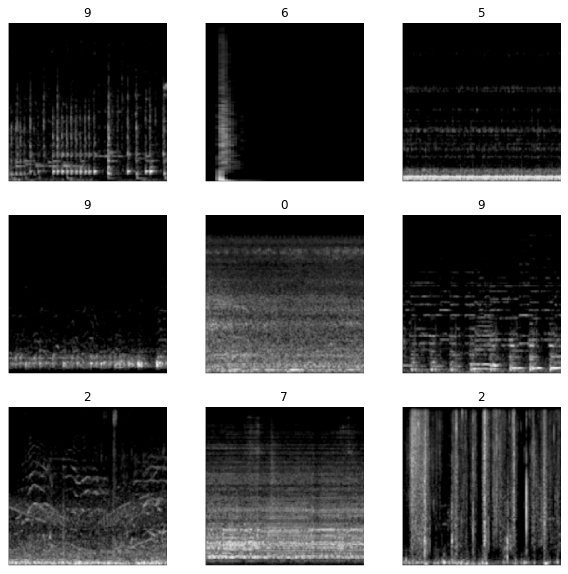

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,
                                kernel_size= (3,3),
                                strides = (1,1),
                                padding = "valid",
                                activation = "relu",
                                input_shape = (256,256,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,
                                kernel_size= (3,3),
                                strides = (1,1),
                                padding = "valid",
                                activation = "relu",
                                input_shape = (256,256,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,
                                kernel_size= (3,3),
                                strides = (1,1),
                                padding = "valid",
                                activation = "relu",
                                input_shape = (256,256,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)      

In [21]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

In [22]:
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)      

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto') ## Save best model

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto') ## Epoch and Accuracy Optimization

rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001) ## Learning rate Optimization

hist = model.fit(train_ds, 
                validation_data= val_ds,
                epochs=30,
                callbacks=[checkpoint,early,rlrop])

Epoch 1/30
218/219 [============================>.] - ETA: 0s - loss: 1.0940 - accuracy: 0.5979
Epoch 1: val_accuracy improved from -inf to 0.66272, saving model to model.h5
219/219 [==============================] - 21s 94ms/step - loss: 1.0936 - accuracy: 0.5978 - val_loss: 1.0334 - val_accuracy: 0.6627 - lr: 0.0010
Epoch 2/30
218/219 [============================>.] - ETA: 0s - loss: 1.0546 - accuracy: 0.6144
Epoch 2: val_accuracy did not improve from 0.66272
219/219 [==============================] - 21s 92ms/step - loss: 1.0542 - accuracy: 0.6147 - val_loss: 1.0846 - val_accuracy: 0.6303 - lr: 0.0010
Epoch 3/30
218/219 [============================>.] - ETA: 0s - loss: 0.9580 - accuracy: 0.6408
Epoch 3: val_accuracy did not improve from 0.66272
219/219 [==============================] - 21s 93ms/step - loss: 0.9581 - accuracy: 0.6407 - val_loss: 1.0297 - val_accuracy: 0.6588 - lr: 0.0010
Epoch 4/30
218/219 [============================>.] - ETA: 0s - loss: 0.9213 - accuracy: 0.659

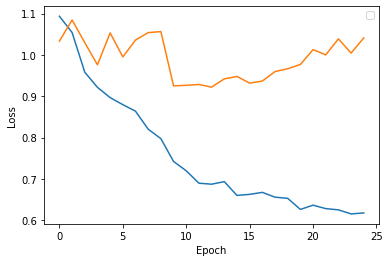

In [29]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

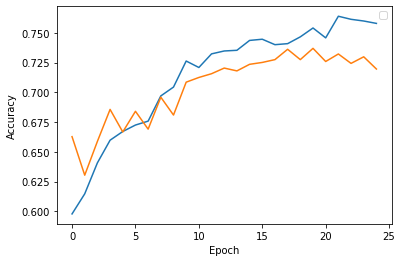

In [30]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [31]:
model.evaluate(test_dataset)

15/15 [==============================] - 2s 71ms/step - loss: 1.0779 - accuracy: 0.7063


[1.0779268741607666, 0.706250011920929]